# Sprint 3 - VRTraining 
## Participantes: 
Paulo Lopes - RM: 551137
Gustavo Melo - RM: 98809
Carlos Ganzerli - RM:98840
Guilherme Alves - RM:550433

In [30]:
%pip install statsmodel

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 
import statsmodels as sm



ModuleNotFoundError: No module named 'statsmodels'

In [2]:
df = pd.read_csv("Sprint3 Diabetes.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### Análise, limpeza e formatação dos dados 
- Remoção de duplicatas 
- Tratamento de valores nulos
- Tratamento de outliers

In [3]:
df = df.drop_duplicates()
df.isnull().sum()
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]


# Gráficos KDE  

Este código cria um conjunto de gráficos KDE, um para cada coluna numérica no DataFrame. Cada gráfico mostra a distribuição da variável correspondente usando uma curva de densidade kernel. Permitindo visualizar rapidamente como cada variável está distribuída em sua escala contínua.

c:\AppData\Local\Temp\ipykernel_4580\2005857143.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[col], ax=axes[i])
c:\AppData\Local\Temp\ipykernel_4580\2005857143.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[col], ax=axes[i])


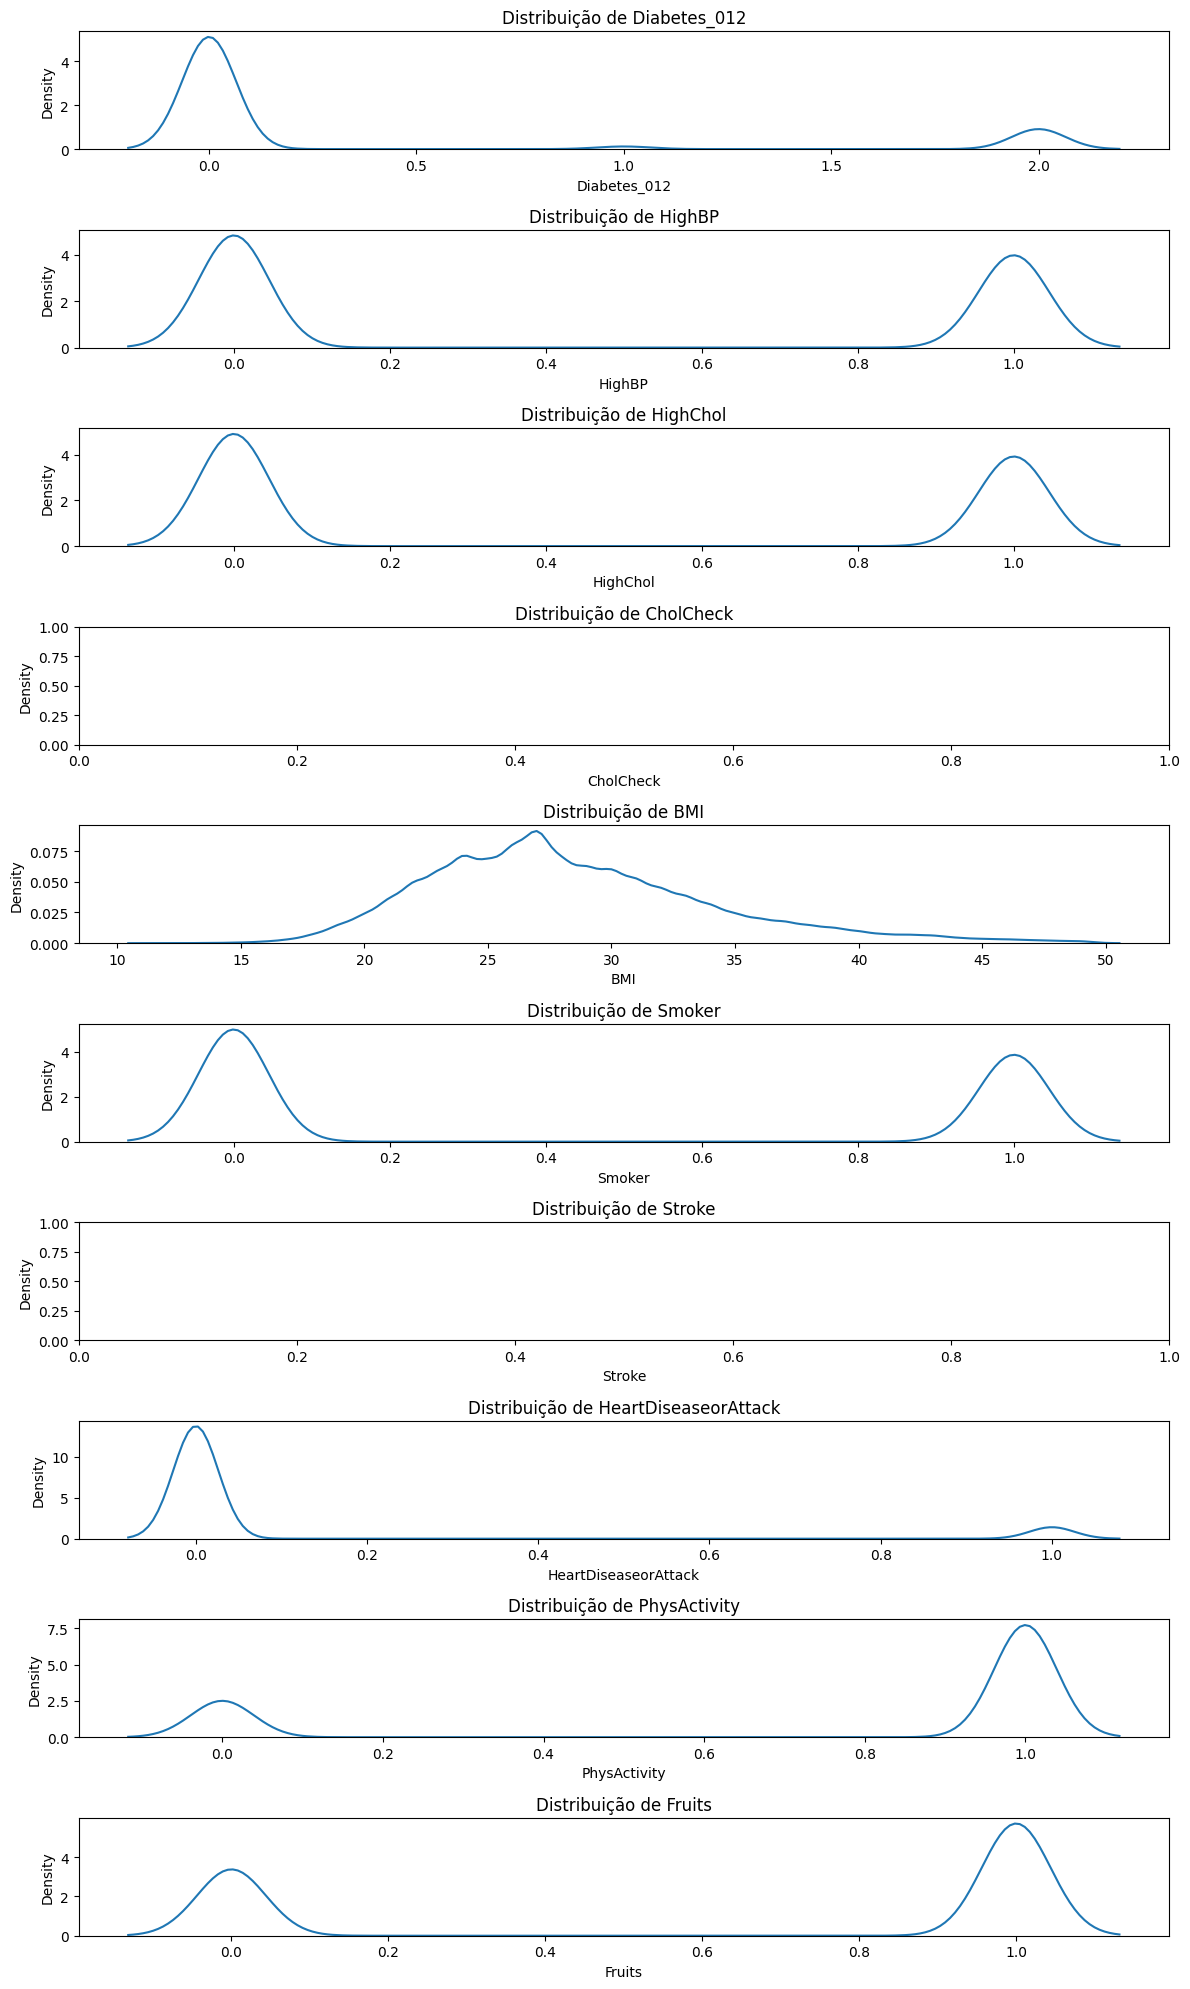

In [4]:
numeric_columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits']

fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 20))
for i, col in enumerate(numeric_columns):
    sns.kdeplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

## Gráfico pairplot no qual mostra  as relações entre as variáveis selecionadas.

 O resultado é uma matriz de subgráficos onde:

- Cada linha representa uma variável.
- As colunas mostram como cada variável se relaciona com todas as outras.
- Os quadrantes superiores esquerdos são gráficos de dispersão das relações entre pares de variáveis.
- A diagonal principal mostra distribuições univariadas (geralmente histogramas ou densidades kernel) de cada variável.

<Figure size 1200x800 with 0 Axes>

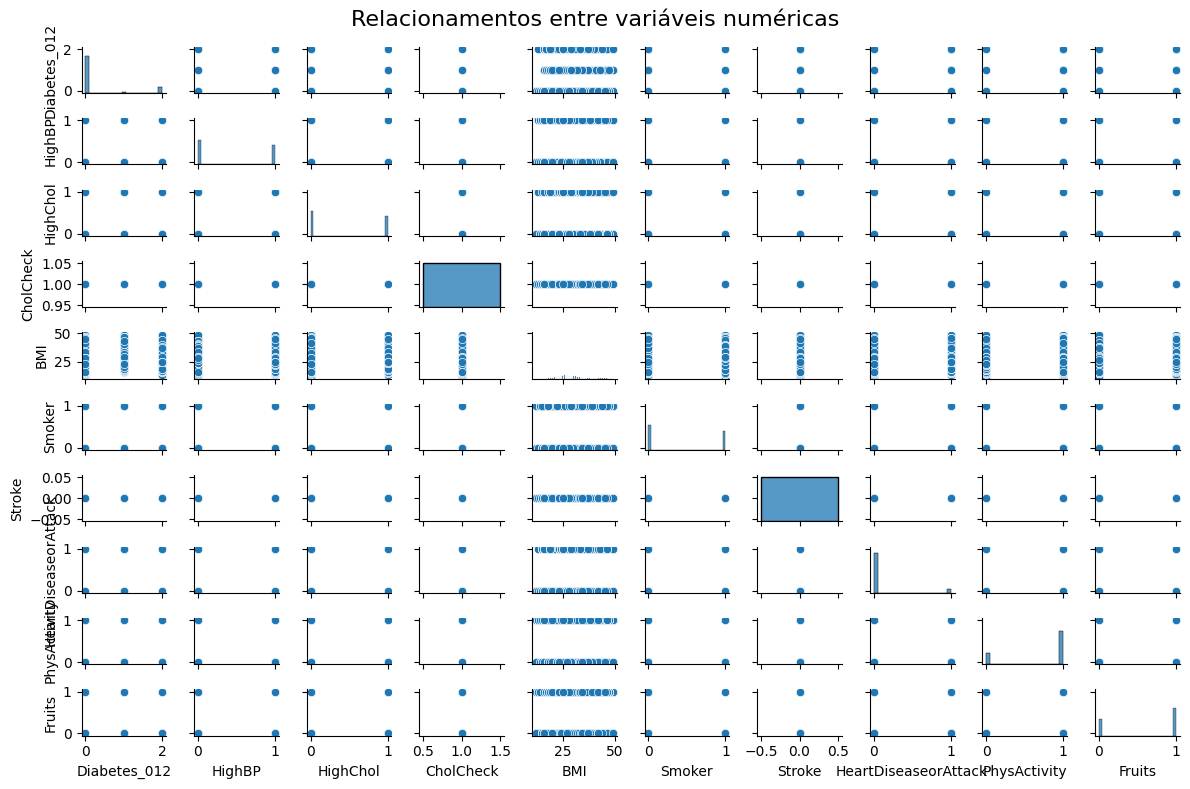

In [23]:
# Selecionar apenas as variáveis mais relevantes
relevant_columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits']

# Criar o pairplot com tamanho reduzido
plt.figure(figsize=(12, 8))
sns.pairplot(df[relevant_columns], height=0.8, aspect=1.5)

# Configurar o título e exibir o gráfico
plt.suptitle('Relacionamentos entre variáveis numéricas', fontsize=16)
plt.tight_layout()
plt.show()

# Regressão Linear

Este código cria um gráfico de regressão linear entre BMI e Diabetes_012 usando seaborn. O resultado é uma linha de regressão com pontos de dados sobrepostos, mostrando a relação linear entre essas duas variáveis. Este tipo de visualização explorar rapidamente se há uma relação linear entre as variáveis e para estimar essa relação através da linha de regressão.

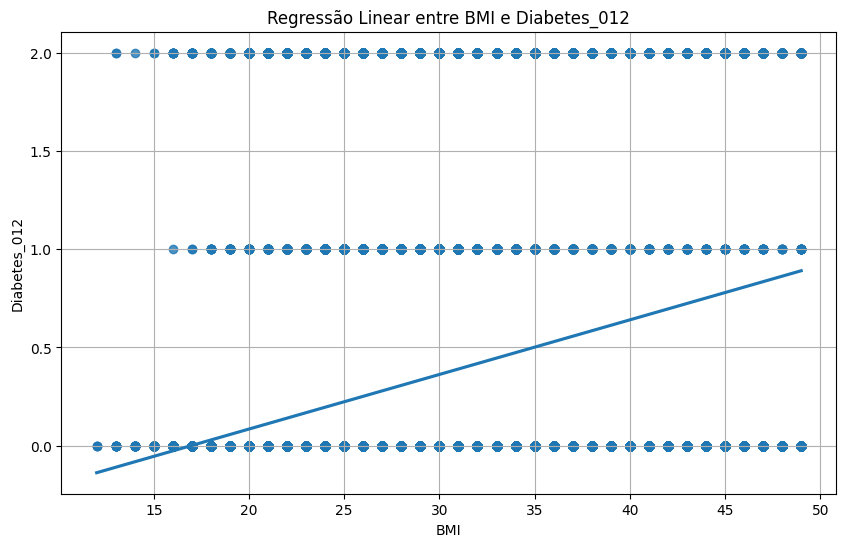

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x='BMI', y='Diabetes_012', data=df, ci=None)
plt.title('Regressão Linear entre BMI e Diabetes_012')
plt.xlabel('BMI')
plt.ylabel('Diabetes_012')
plt.grid(True)
plt.show()

# Gráfico de barra para variáveis

Para o código abaixo foi criado uma série de gráficos de barra, cada gráfico mostra a contagem de observações em cada categoria da variável correspondente

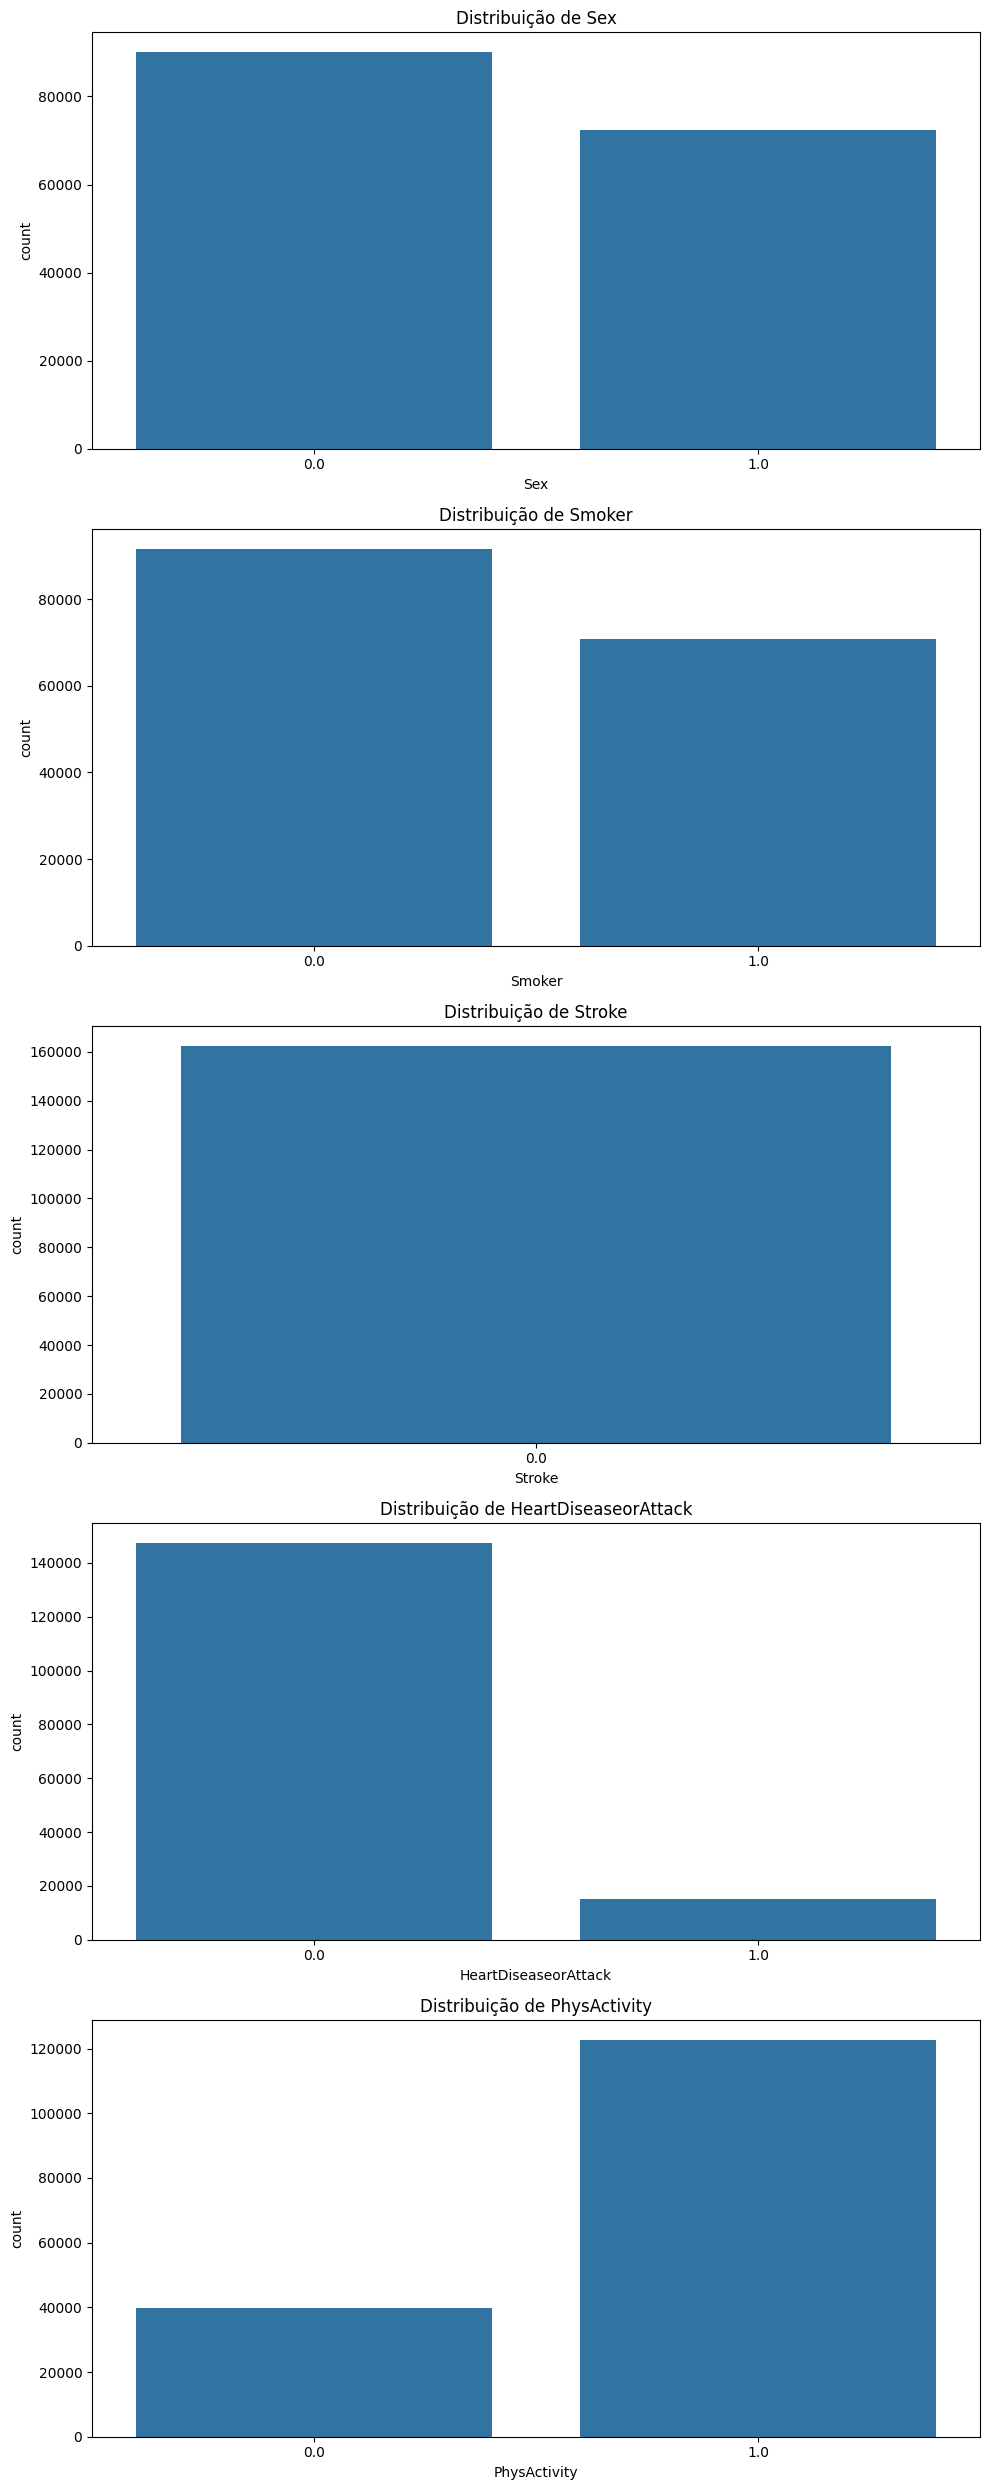

In [7]:
categorical_columns = ['Sex', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity']

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, len(categorical_columns)*5))
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Matriz de Correlação
Este código cria uma matriz de correlação entre as colunas relevantes do DataFrame e a visualiza como um heatmap colorido. As cores na matriz indicam o grau de correlação entre as variáveis:

Azul claro: Correlação negativa fraca
Branco: Correlação neutra (não significativa)
Vermelho claro: Correlação positiva forte

O heatmap permite visualizar rapidamente quais variáveis estão correlacionadas, em que grau e na qual direção (positiva ou negativa). Sendo útil para identificar padrões interessantes nos dados e potencialmente multicollinearidade entre variáveis.


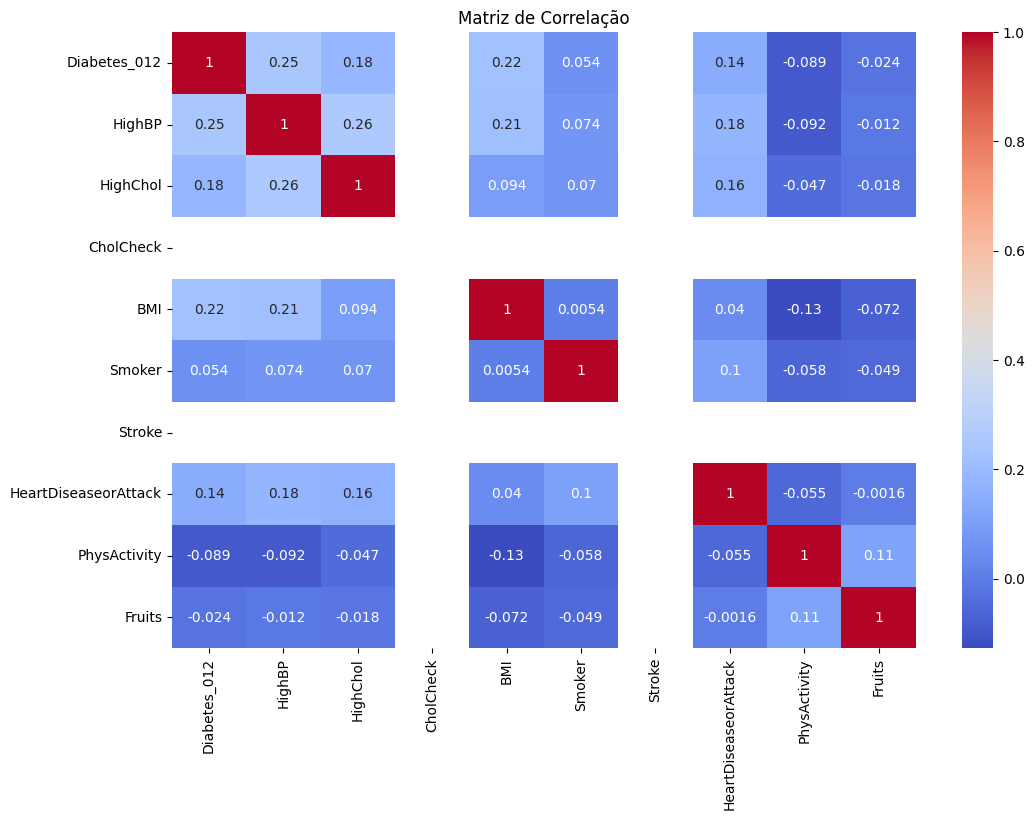

In [37]:
correlation_matrix = df[relevant_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Teste de hipótese 1

Interpreta o resultado do teste, considerando um nível de significância padrão de 0.05. Esta análise sugere uma forte associação entre fumar e aumento do risco de doenças cardíacas. Isso concorda com estudos anteriores que mostraram que fumantes têm um maior risco de desenvolver doenças cardíacas comparados a não-fumantes. 

Em conclusão, esta análise confirma a associação conhecida entre fumar e aumento do risco de doenças cardíacas, reforçando a importância de evitar o tabagismo para reduzir o risco cardiovascular.



Média de HeartDiseaseorAttack entre fumantes: 0.1269968952864804
Média de HeartDiseaseorAttack entre não-fumantes: 0.06590091911563808
T-statística: -42.35817245670858
P-value: 0.0
Há diferença significativa na frequência de HeartDiseaseorAttack entre fumantes e não-fumantes.


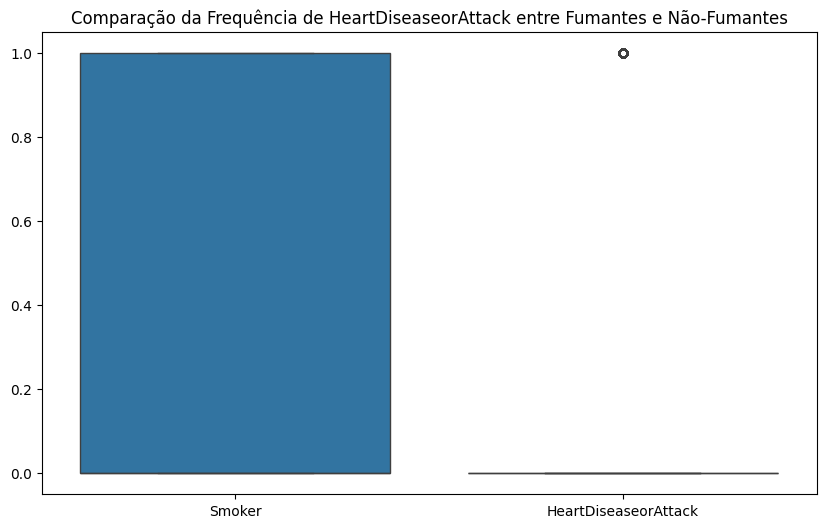

In [34]:
# Selecionar as variáveis para o teste
smoker_col = 'Smoker'
heart_disease_col = 'HeartDiseaseorAttack'

# Criar grupos baseados na variável Smoker
grouped_df = df.groupby(smoker_col)[heart_disease_col]

# Calcular médias para cada grupo
mean_smoker = grouped_df.get_group(1).mean()
mean_non_smoker = grouped_df.get_group(0).mean()

print(f"Média de HeartDiseaseorAttack entre fumantes: {mean_smoker}")
print(f"Média de HeartDiseaseorAttack entre não-fumantes: {mean_non_smoker}")

# Realizar o teste t de diferença entre médias
t_statistic, p_value = stats.ttest_ind(df[df['Smoker'] == 0][heart_disease_col], df[df['Smoker'] == 1][heart_disease_col])

print(f"T-statística: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretar o resultado do teste
alpha = 0.05  # Nível de significância padrão
if p_value < alpha:
    print("Há diferença significativa na frequência de HeartDiseaseorAttack entre fumantes e não-fumantes.")
else:
    print("Não há diferença significativa na frequência de HeartDiseaseorAttack entre fumantes e não-fumantes.")

# Visualizar os dados com um boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data={'Smoker': df[smoker_col], heart_disease_col: df[heart_disease_col]})
plt.title('Comparação da Frequência de HeartDiseaseorAttack entre Fumantes e Não-Fumantes')
plt.show()

# Teste de hipótese 2

Esta análise interpreta o resultado do teste, considerando um nível de significância padrão de 0.05. Também suegere uma forte associação entre o aumento do BMI e o risco de desenvolver diabetes. 

Média de BMI entre diabéticos: 30.183770129460058
Média de BMI entre não-diabéticos: 27.76285836922576
T-statística: -24.59352762538577
P-value: 2.871116269426606e-133
Há diferença significativa na distribuição do BMI entre diabéticos e não-diabéticos.


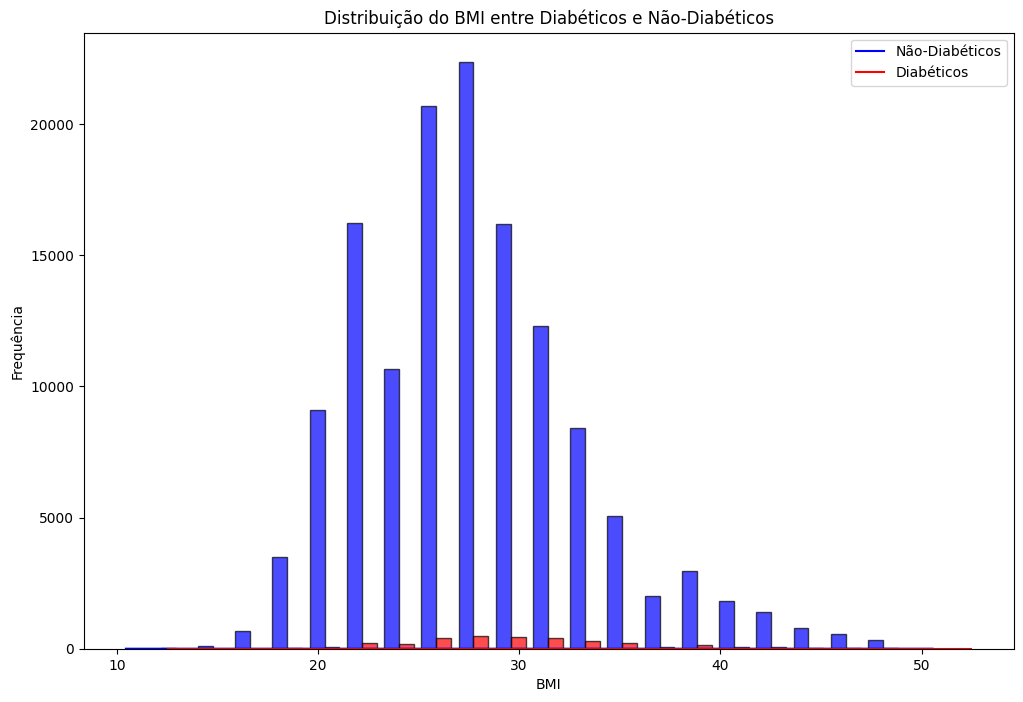

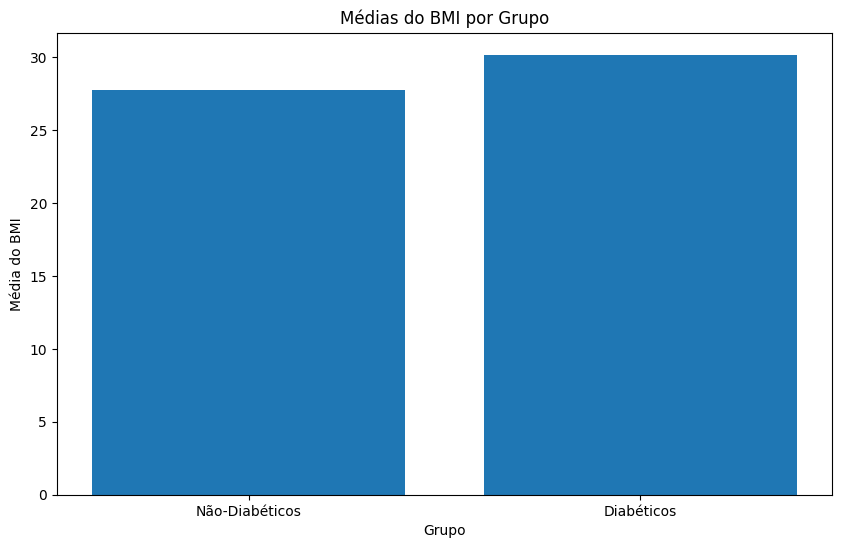

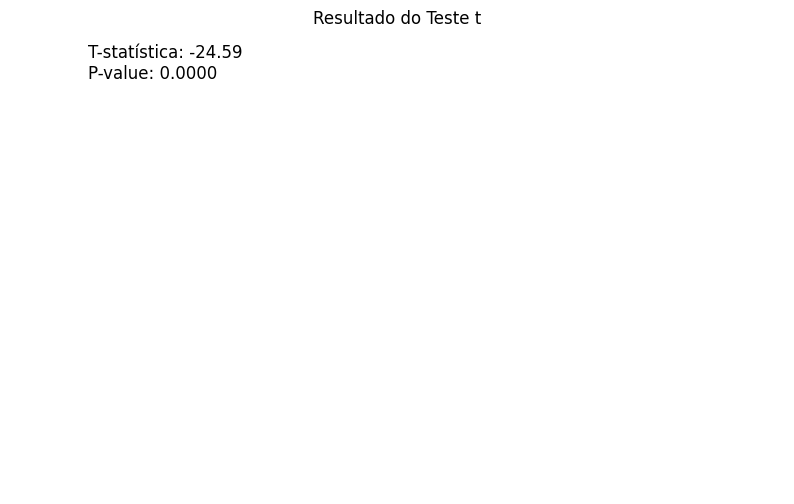

In [36]:
# Selecionar as variáveis para o teste
bmi_col = 'BMI'
diabetes_col = 'Diabetes_012'

# Criar grupos baseados na variável Diabetes_012
grouped_df = df.groupby(diabetes_col)[bmi_col]

# Calcular médias para cada grupo
mean_diabetes_positive = grouped_df.get_group(1).mean()
mean_diabetes_negative = grouped_df.get_group(0).mean()

print(f"Média de BMI entre diabéticos: {mean_diabetes_positive}")
print(f"Média de BMI entre não-diabéticos: {mean_diabetes_negative}")

# Realizar o teste t de diferença entre médias
t_statistic, p_value = stats.ttest_ind(df[df['Diabetes_012'] == 0][bmi_col], df[df['Diabetes_012'] == 1][bmi_col])

print(f"T-statística: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretar o resultado do teste
alpha = 0.05  # Nível de significância padrão
if p_value < alpha:
    print("Há diferença significativa na distribuição do BMI entre diabéticos e não-diabéticos.")
else:
    print("Não há diferença significativa na distribuição do BMI entre diabéticos e não-diabéticos.")

# Criar um histograma com barras superpostas
plt.figure(figsize=(12, 8))
plt.hist([df[df['Diabetes_012'] == 0][bmi_col], df[df['Diabetes_012'] == 1][bmi_col]], 
         bins=20, edgecolor='black', color=['blue', 'red'], alpha=0.7)
plt.title('Distribuição do BMI entre Diabéticos e Não-Diabéticos')
plt.xlabel('BMI')
plt.ylabel('Frequência')

# Adicionar uma linha de tendência para cada grupo
sns.kdeplot(df[df['Diabetes_012'] == 0][bmi_col], color='blue', label='Não-Diabéticos')
sns.kdeplot(df[df['Diabetes_012'] == 1][bmi_col], color='red', label='Diabéticos')

plt.legend()
plt.show()

# Adicionar um gráfico de barras para comparação das médias
plt.figure(figsize=(10, 6))
plt.bar(['Não-Diabéticos', 'Diabéticos'], [mean_diabetes_negative, mean_diabetes_positive])
plt.title('Médias do BMI por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Média do BMI')
plt.show()

# Adicionar uma caixa de texto com o resultado do teste
plt.figure(figsize=(10, 6))
plt.text(0.1, 0.9, f"T-statística: {t_statistic:.2f}\nP-value: {p_value:.4f}", 
         transform=plt.gca().transAxes, fontsize=12)
plt.title('Resultado do Teste t')
plt.axis('off')
plt.show()